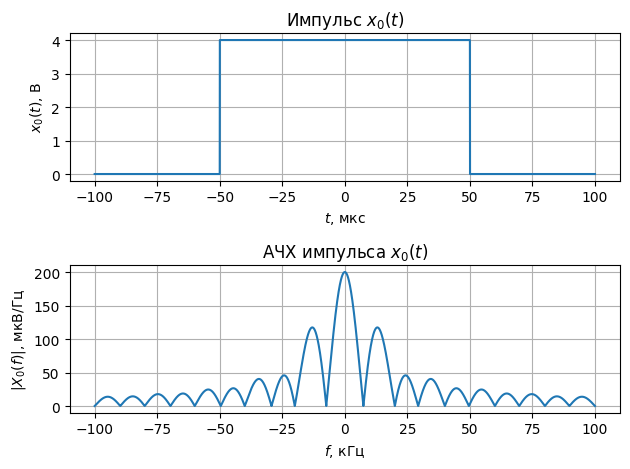

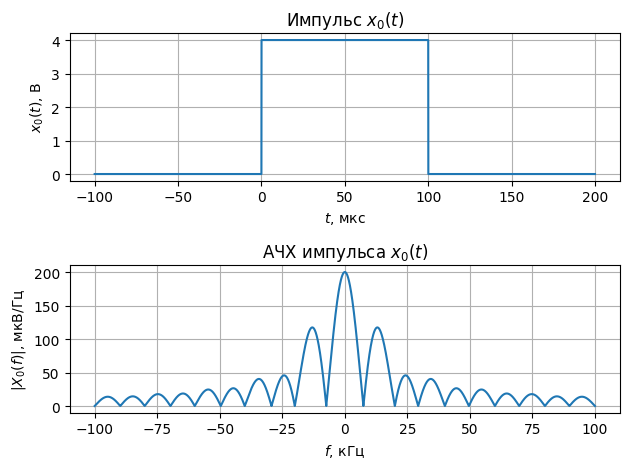

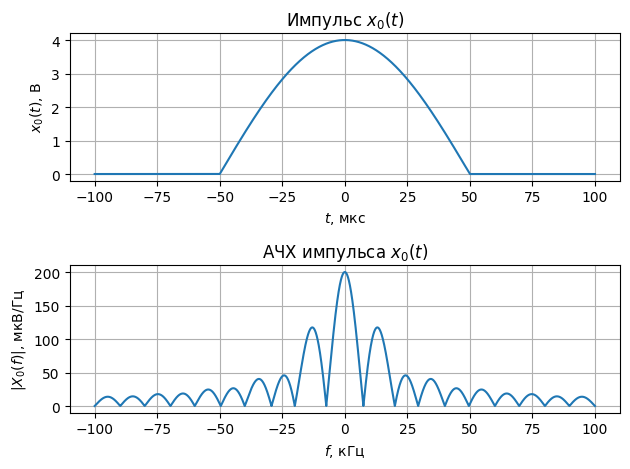

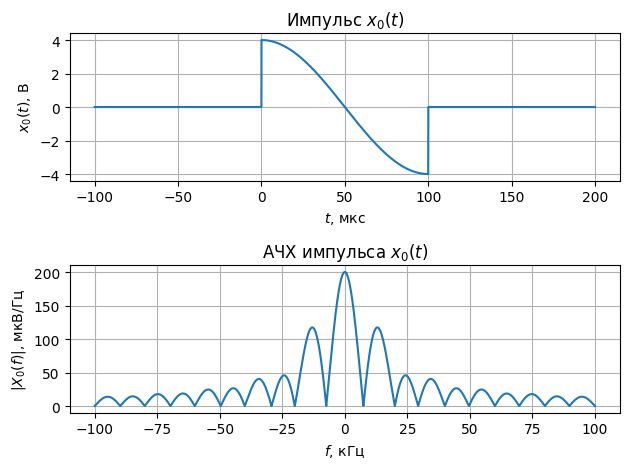

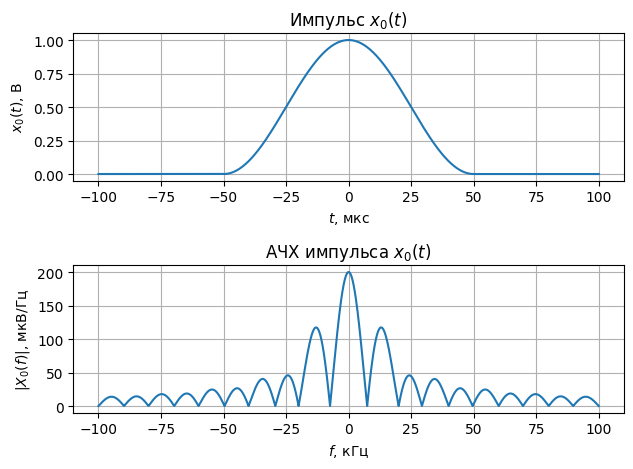

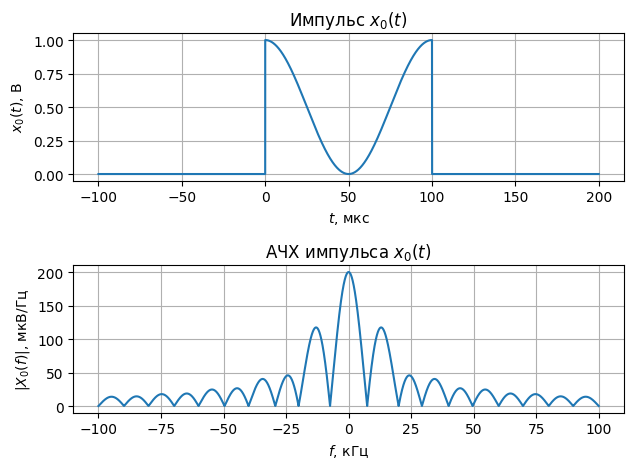

In [11]:
import numpy as np
import matplotlib.pyplot as plt

tau=100e-6
E=4

def sinc(x):
    return np.sin(x) / x if x != 0 else 1

def x_1(t, E, tau):
    return E if np.abs(t) < tau / 2 else 0.0

def X_1(f, E, tau):
    return E * tau * sinc(np.pi * f * tau)

def x_2(t, E, tau):
    return E if 0 <= t <= tau else 0.0

def X_2(f, E, tau):
    return E * tau * sinc(np.pi * f * tau) * np.exp(-1.j * np.pi * f * tau)

def x_3(t, E, tau):
    return E * np.cos(np.pi * t / tau) if np.abs(t) < tau / 2 else 0.0

def X_3(f, E, tau):
    return (E * tau / 2) * (sinc(np.pi / 2 - np.pi * f * tau) + sinc(np.pi / 2 + np.pi * f * tau)) 

def x_4(t, E, tau):
    return E * np.cos(np.pi * t / tau) if 0 <= t <= tau else 0.0

def X_4(f, E, tau):
    return (E * tau / 2) * (sinc(np.pi / 2 - np.pi * f * tau) + sinc(np.pi / 2 + np.pi * f * tau)) * np.exp(-1.j * np.pi * f * tau)

def x_5(t, E, tau):
    return (1 + np.cos(2 * np.pi * t / tau)) / 2 if np.abs(t) < tau / 2 else 0.0

def X_5(f, E, tau):
    return (tau / 2) * sinc(np.pi * f * tau) * 1 / (1 - tau**2 * f**2)

def x_6(t, E, tau):
    return (1 + np.cos(2 * np.pi * t / tau)) / 2 if 0 <= t <= tau else 0.0

def X_6(f, E, tau):
    return (tau / 2) * sinc(np.pi * f * tau) * 1 / (1 - tau**2 * f**2) * np.exp(-1.j * np.pi * f * tau)

f_band = np.linspace(-10/tau, 10/tau, num=2**14)

signals = [x_1, x_2, x_3, x_4, x_5, x_6]
spectrums = (X_1, X_2, X_3, X_4, X_5, X_6)

for i in range(6):
    if i % 2 == 0:
        t_band = np.linspace(-tau, tau, num=2**14)
    else:
        t_band = np.linspace(-tau, 2 * tau, num=2**14)
    
    x = np.array([signals[i](t, E, tau) for t in t_band])
    X = np.array([spectrums[i](f, E, tau) for f in f_band])
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t_band*1e6, x)
    plt.title("Импульс $x_0(t)$")
    plt.xlabel("$t$, мкc")
    plt.ylabel("$x_0(t)$, В")
    plt.tight_layout()
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.title("АЧХ импульса $x_0(t)$")
    plt.plot(f_band*1e-3, abs(Xf)*1e6)
    plt.ylabel("$|X_0(f)|$, мкВ/Гц")
    plt.xlabel("$f$, кГц")
    plt.tight_layout()
    plt.grid()
    plt.show()